# PRÉDICTION DE PRÉSENCE DE MALADIE CARDIAQUE

Les maladies cardiovasculaires sont la première cause de décès dans le monde, 
faisant environ 17,9 millions de vies chaque année, 
ce qui représente 31 % de tous les décès dans le monde. 
Quatre décès sur 5 par MCV sont dus à des crises cardiaques et 
à des accidents vasculaires cérébraux, 
et un tiers de ces décès surviennent prématurément 
chez des personnes de moins de 70 ans. 
L'insuffisance cardiaque est un événement courant causé 
par les maladies cardiovasculaires et cet ensemble de données 
contient 11 caractéristiques qui peuvent être utilisées pour prédire 
une éventuelle maladie cardiaque.

Les personnes atteintes de maladies cardiovasculaires ou 
à haut risque cardiovasculaire (en raison de la présence d'un ou plusieurs facteurs
de risque tels que l'hypertension, le diabète, l'hyperlipidémie ou 
une maladie déjà établie) 
ont besoin d'une détection et d'une gestion précoces dans lesquelles 
un modèle d'apprentissage automatique peut être d'une grande aide.

INFORMATIONS SUR LES ATTRIBUTS

AGE : âge du patient 

SEXE : sexe du patient [homme, femme]

TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]

PAR : pression artérielle au repos [mm Hg]

CHOLESTEROL : cholestérol sérique [mm/dl]

GAJ : glycémie à jeun [1 : si glycémie à jeun > 120 mg/dl, 0 : sinon]

ECG au repos : résultats de l'électrocardiogramme au repos [Normal : normal, ST : présentant une anomalie de l'onde ST-T, HVG : montrant une hypertrophie ventriculaire gauche probable]

FCMAX : fréquence cardiaque maximale atteinte. La fréquence cardiaque est le nombre de battements cardiaques (ou pulsations) par unité de temps (généralement la minute). 

ANGINE : angine induite par l'exercice [Oui, Non]

DEPRESSION : Valeur numérique mesurée en dépression

PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]

COEUR : maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

In [27]:
data = pd.read_excel("Dataset.xlsx")

In [41]:
df = data.copy()
df.head(10)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
5,39,homme,DNA,120,339,0,Normal,170,Non,0.0,Ascendant,0
6,45,femme,AA,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,AA,110,208,0,Normal,142,Non,0.0,Ascendant,0
8,37,homme,ASY,140,207,0,Normal,130,Oui,1.5,Plat,1
9,48,femme,AA,120,284,0,Normal,120,Non,0.0,Ascendant,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [37]:
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [39]:
df.duplicated().sum()

0

## ANALYSE EXPLORATOIRE

### I) ANALYSE UNIVARIÉE

#### I.1) Étude de variables qualitatives

In [80]:
quali_columns = df.select_dtypes("object").columns.tolist()
quali_columns.append('GAJ')
quali_columns

['SEXE', 'TDT', 'ECG', 'ANGINE', 'PENTE', 'GAJ']

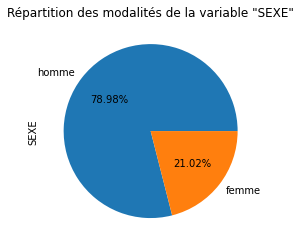

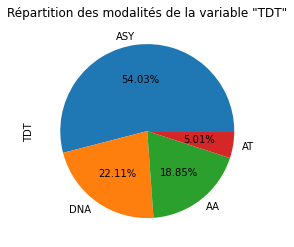

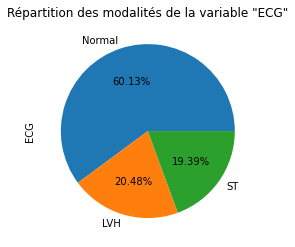

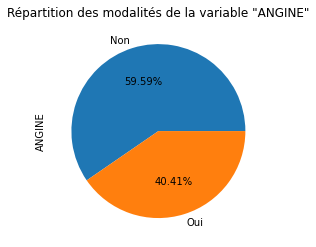

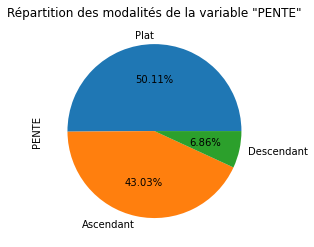

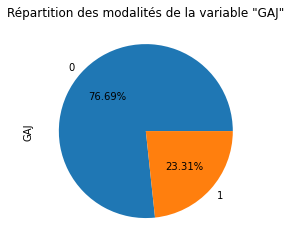

In [165]:
for col in quali_columns:
    df[col].value_counts().plot.pie(autopct='%1.2f%%')
    plt.title(f'Répartition des modalités de la variable "{col}"')
    plt.show()

#### I.2) Étude de variables quantitatives

In [116]:
quanti_columns = [col for col in df.columns if col not in quali_columns]
quanti_columns.remove('CŒUR')
quanti_columns

['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION']

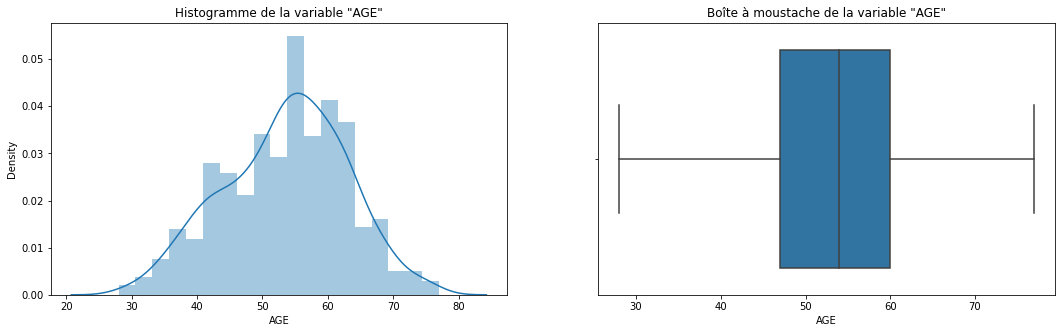

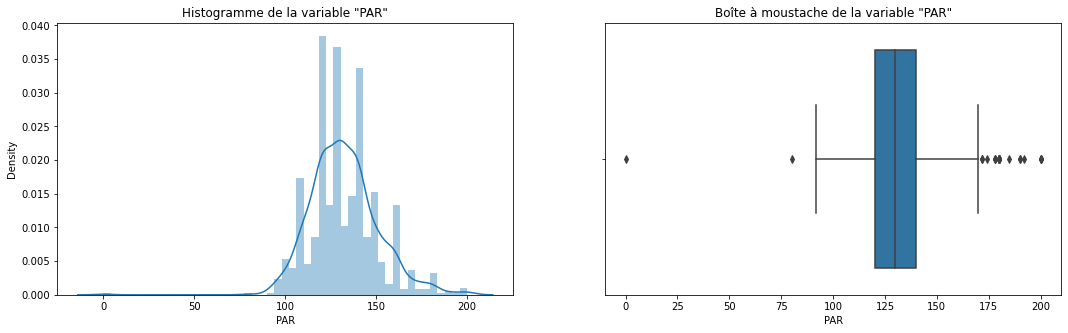

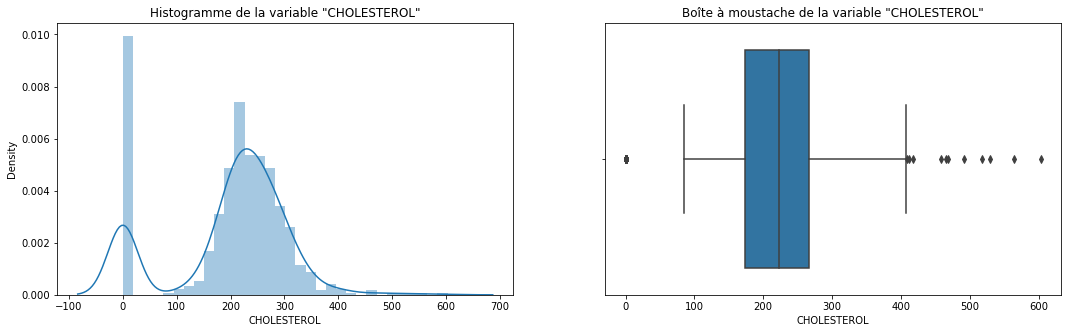

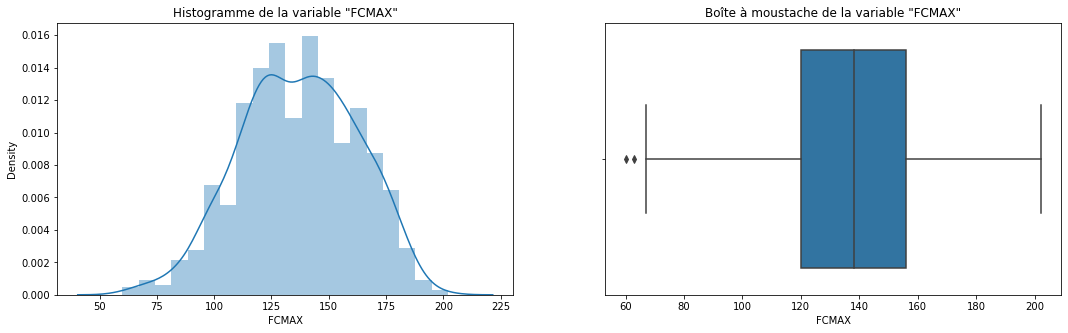

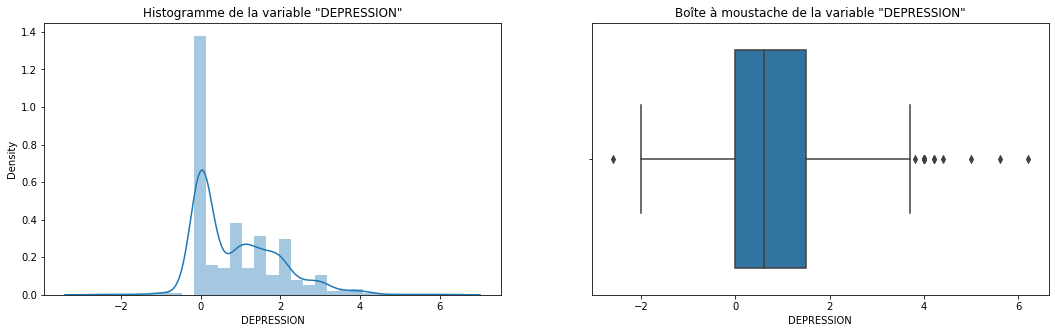

In [123]:
for col in quanti_columns:
    plt.figure(figsize=(18,5))
    plt.subplot(121)
    plt.title(f'Histogramme de la variable "{col}"')
    sns.distplot(df[col])

    plt.subplot(122)
    plt.title(f'Boîte à moustache de la variable "{col}"')
    sns.boxplot(df[col])
    plt.show()
    print("=="*60)

### II) ANALYSE BIVARIÉE

#### II.1) Étude de variables quantitatives deux à deux

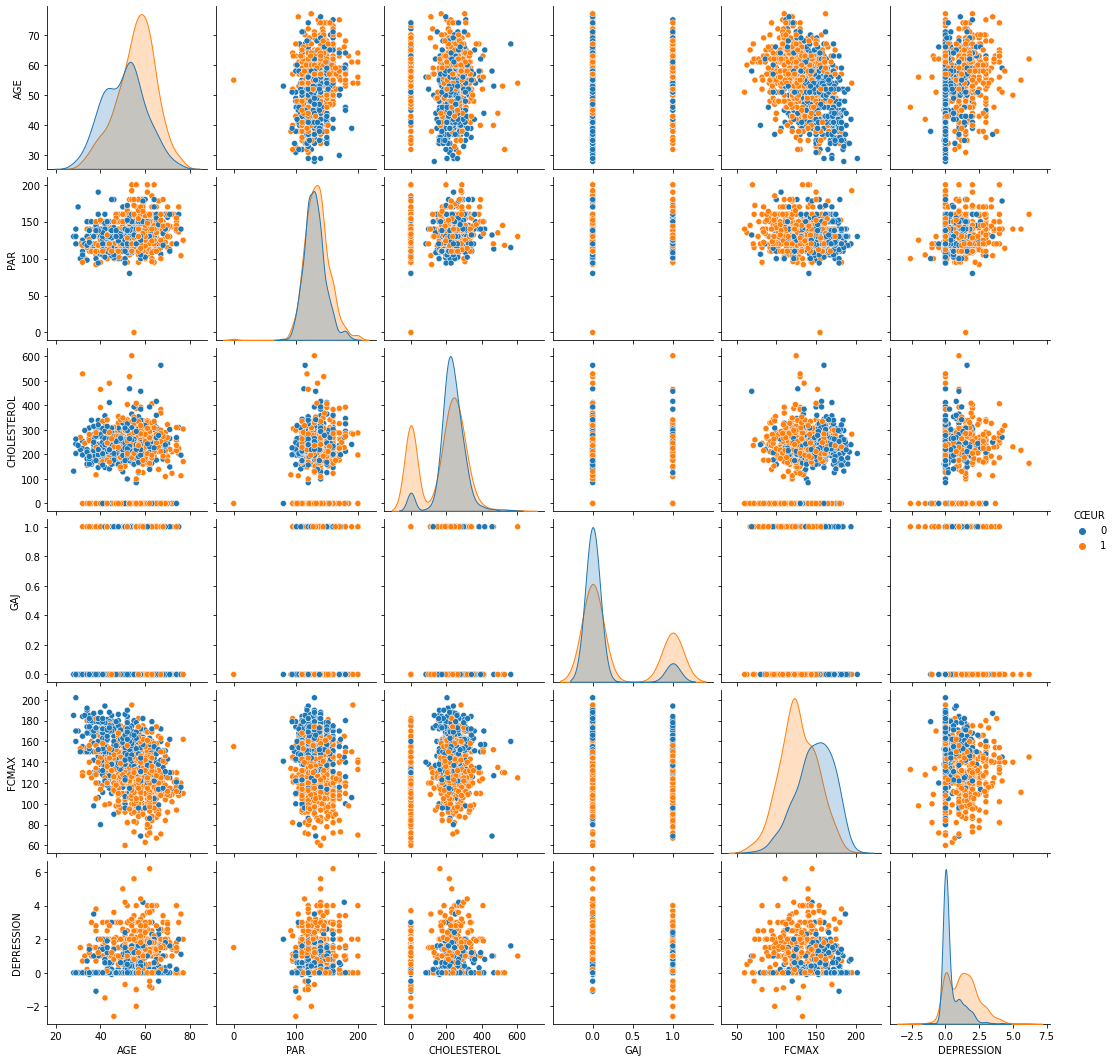

In [130]:
sns.pairplot(df, hue = 'CŒUR')

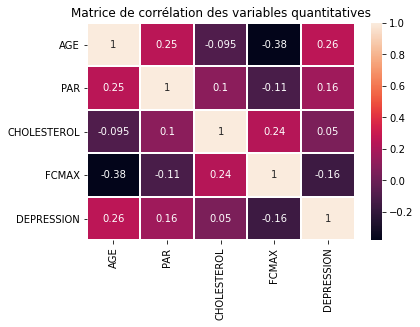

In [173]:
sns.heatmap(df[quanti_columns].corr(), linewidth = 1 , annot = True)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

#### II.2) Étude de variables qualitatives deux à deux

In [238]:
def cramers_V(var1,var2):
    
    #Création de la table de contingence
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
    #Récupération de la statistique de Chi-deux
    stat = chi2_contingency(crosstab)[0] 
    #Nombre des observations
    obs = np.sum(crosstab) 
    #Récupération de la valeur minimale de la taille de la table de contingence
    mini = min(crosstab.shape)-1 
    return (stat/(obs*mini))

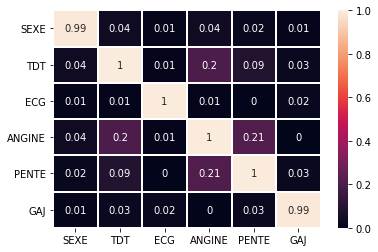

In [244]:
rows= []

for var1 in df[quali_columns]:
    col = []
    for var2 in df[quali_columns] :
        #Test V de Cramer
        cramers =cramers_V(df[quali_columns][var1], df[quali_columns][var2]) 
        #Récupération de l'arrondi de la valeur du test V de Cramer
        col.append(round(cramers,2))  
    rows.append(col)
    
cramers_results = np.array(rows)
cramer_table = pd.DataFrame(cramers_results, columns = df[quali_columns].columns, index =df[quali_columns].columns)

cramer_table = sns.heatmap(cramer_table,linewidth = 1 , annot = True)

### III) ÉTUDE DE LA VARIABLE CIBLE "COEUR"

#### III.1) Visualisation de la variable cible

<AxesSubplot:ylabel='CŒUR'>

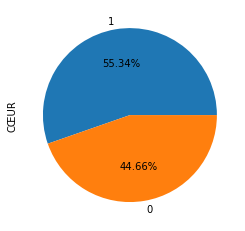

In [135]:
df["CŒUR"].value_counts().plot.pie(autopct='%1.2f%%')

#### III.2) Visualisation de la variable cible avec les variables qualitatives

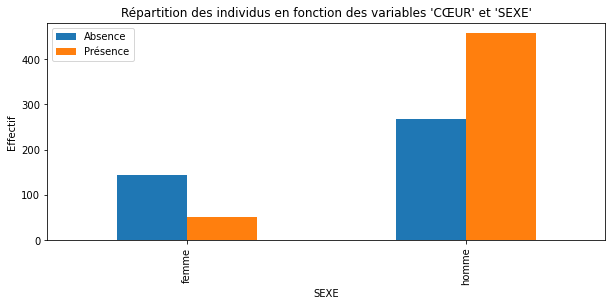

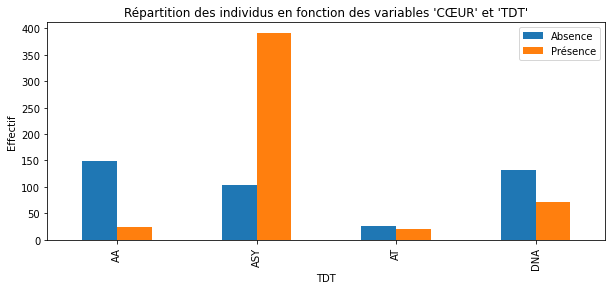

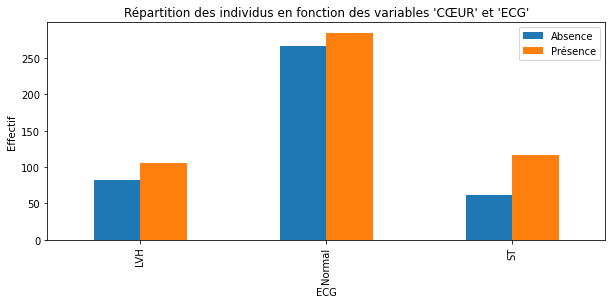

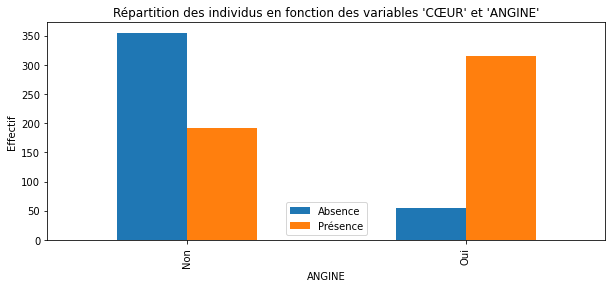

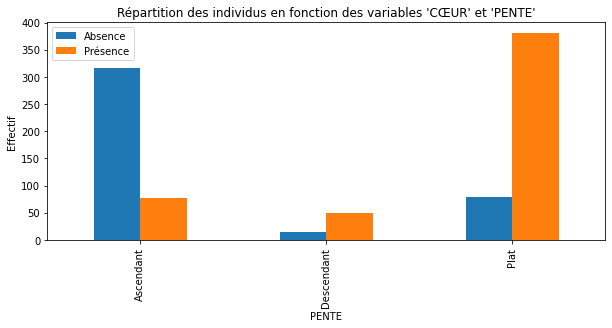

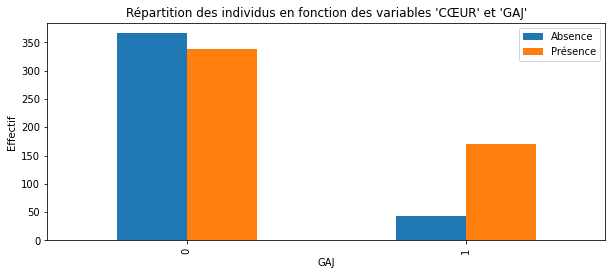

In [171]:
for col in quali_columns:
    pd.crosstab(df[col],df['CŒUR']).plot(kind="bar",figsize=(10,4))
    plt.legend(["Absence", "Présence"])
    plt.ylabel('Effectif')
    plt.title(f"Répartition des individus en fonction des variables 'CŒUR' et '{col}'")
    plt.show()

#### III.3) Visualisation de la variable cible avec les variables quantitatives

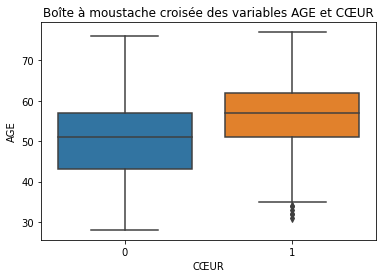

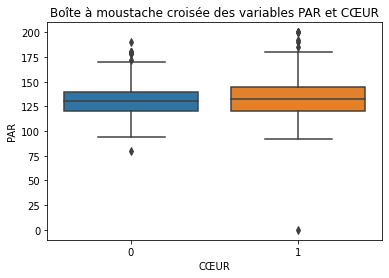

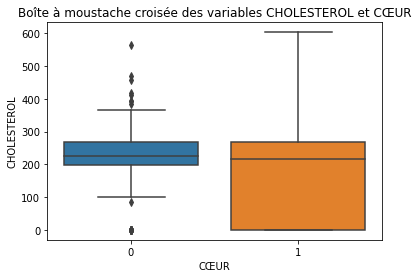

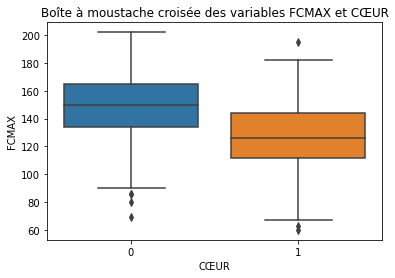

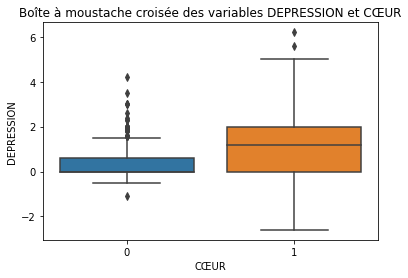

In [192]:
for col in quanti_columns:    
    sns.boxplot(y=df[col], x=df.CŒUR, data=df)
    plt.title(f"Boîte à moustache croisée des variables {col} et CŒUR")
    plt.show()

### COMMENTAIRES DE L'ANALYSE EXPLORATOIRE

Le jeu de données contient:
- 918 individus (entrées)
- 12 variables (colonnes) dont 7 variables quantitatives et 5 variables qualitatives.

Grâce aux informations sur le jeu de données et aux métadonnées, on peut mieux déterminer le type de chaque variable utilisée.
D'après les métadonnées, les variables **GAJ** et **COEUR** ont été déjà encodées. Elles seront donc considérées comme étant des variables qualitatives. Nous possédons: 
- 5 variables quantitatives (AGE, PAR, CHOLESTEROL, FCMAX et DEPRESSION)
- 7 variables qualitatives (SEXE, TDT, GAJ, ECG, ANGINE, PENTE et COEUR)

Il n'y a **aucune** données manquantes et **aucun** individu n'a été dupliqué (ligne) dans notre jeu de données.

**ANALYSE UNIVARIÉE**

**Étude de variables qualitatives**

- Dans le jeu de données, les hommes sont majoritairement représentés que les femmes (79% pour les hommes et seulement 21% pour la gente féminine).
- Il y a 54.03% de personnes qui ont des douleurs thoraciques asymptomatiques(ASY), 22.11% qui ont des douleurs non angineuses(DNA), 18.85% qui ont une angine atypique(AA) et 5.01% qui ont une angine typique (AT). 
- Plus de la moitié des individus a une activité électrique du coeur assez normale (60.13%). Ceux qui ont une anomalie de l'onde ST-T (ST) et ceux qui montrent une probable hypertrophie ventriculaire gauche (LVH) se répartissent quasiment dans les mêmes proportions (19.39% pour ST et 20.48% pour LVH).
- 59.59% des individus de notre jeu de données ont une angine induite par l'exercice.
- La moitié des individus (50.11%) présente une pente plate du segment ST. Ceux ayant une pente ascendante représentent 43.03% des individus. Les 6.86% restants représentent ceux qui ont une pente descendante.
- Une grande partie des individus (soit 76.69%) a une glycémie à jeun supérieure à 120 mg/dl.

**Étude de variables quantitatives**

- À travers les différentes boîtes à moustaches, on remarque que les variables **PAR, CHOLESTEROL, FCMAX, DEPRESSION** contiennent des valeurs aberrantes.

**ANALYSE BIVARIÉE**

**Étude de variables quantitatives deux à deux**
- La matrice de nuages de points nous montrent qu'il n'y a peut être pas de corrélation linéaire entre les variables quantitatives AGE, PAR, CHOLESTEROL, FCMAX, DEPRESSION. De plus, on peut supposer elles ne permettent pas à elles-seules (lorsqu'elles sont prises deux à deux) de discriminer la variable cible COEUR.
- À travers la matrice de corrélation, on constate qu'il y a une très faible correlation entre les variables quantitatives lorqu'elles sont croisées deux à deux. Les valeurs des coefficients de corrélation sont dans l'intervalle [-0.38, 0.26].

**Étude de variables qualitatives deux à deux**
- D'après le test de Cramer, on observe qu'il n'y a quasiment pas de dépendance entre les variables qualitatives. Les valeurs des différents test V de Cramer sont très faibles (dans l'intervalle [0, 0.09]).

**ÉTUDE DE LA VARIABLE CIBLE "COEUR"**
- Dans ce jeu de données, il y a 55.34% d'individus qui sont atteintes d'une maladie cardiovasculaire.
- On remarque que les hommes, les personnes ayant une douleur thoracique asymptomatique, celles qui ont une angine après un exercice et celles dont la pente du segment ST est plate, sont beaucoup plus atteintes par les maladies cardiovasculaires.
- On constate aussi que les personnes susceptibles d'avoir une maladie cardiovasculaire sont les personnes agées ou celles qui ont fréquence cardiaque maximale basse ou encore celles qui ont dépression élevée.